In [1]:
# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

train = pd.read_csv('../fifa/train.csv')

In [3]:
data_dict = pd.read_excel('../fifa/DataDictionary.xlsx')
data_dict

,Feature,Description
0,Name,Player name
1,Age,Age of the player
2,Nationality,Country name
3,Overall,Value of the player
4,Potential,Strength of the player
5,Club,Club name of the player
6,Value (M),Income
7,Position,Position of the player
8,Wage (M),Monthly income


In [4]:
train.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           14384 non-null  int64  
 1   Name         14384 non-null  object 
 2   Age          14384 non-null  int64  
 3   Nationality  14384 non-null  object 
 4   Overall      14384 non-null  int64  
 5   Potential    14384 non-null  int64  
 6   Club         14173 non-null  object 
 7   Value (M)    14384 non-null  float64
 8   Wage (M)     14384 non-null  float64
 9   Position     14384 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [6]:
# Count of null values

train.isnull().sum()

Id               0
Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

In [7]:
# descriptive stats for numerical data

train.describe()

,Id,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,8992.892728,25.148776,66.237695,71.181869,2.344967,0.011435
std,5183.996368,4.620911,6.954458,6.074111,5.105376,0.022614
min,0.000000,16.000000,46.000000,46.000000,0.000000,0.000000
25%,4480.750000,21.000000,62.000000,67.000000,0.300000,0.002000
50%,9001.500000,25.000000,66.000000,71.000000,0.675000,0.004000
75%,13470.250000,28.000000,71.000000,75.000000,2.100000,0.012000
max,17980.000000,47.000000,94.000000,94.000000,105.000000,0.565000


In [8]:
# descriptive stats for categorical data type

train.describe(exclude=np.number)

,Name,Nationality,Club,Position
count,14384,14384,14173,14384
unique,13708,158,647,15
top,J. Rodríguez,England,Villarreal CF,CB
freq,6,1288,33,2144


## Observation

1. Value and Wage seem to be skewed.
2. min of 0 for Value and Wage seem odd.

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

## EDA - Univariate (Numeric)

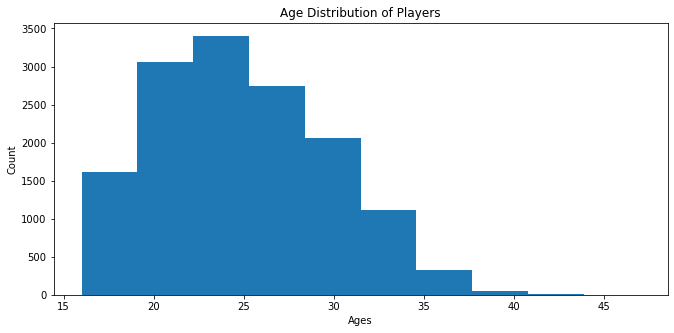

In [9]:
# Age Distribution

train['Age'].plot(kind='hist', figsize=(11,5))
plt.title('Age Distribution of Players')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

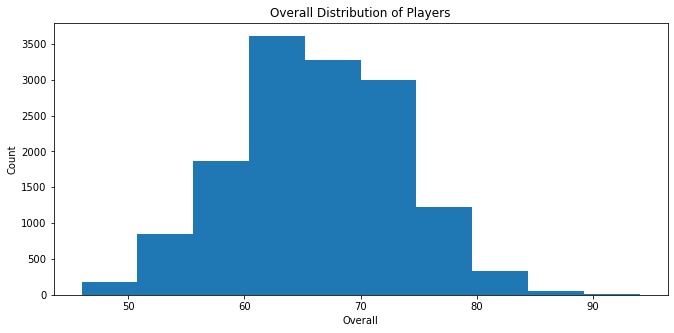

In [10]:
# Overall Distribution

train['Overall'].plot(kind='hist', figsize=(11,5))
plt.title('Overall Distribution of Players')
plt.xlabel('Overall')
plt.ylabel('Count')
plt.show()

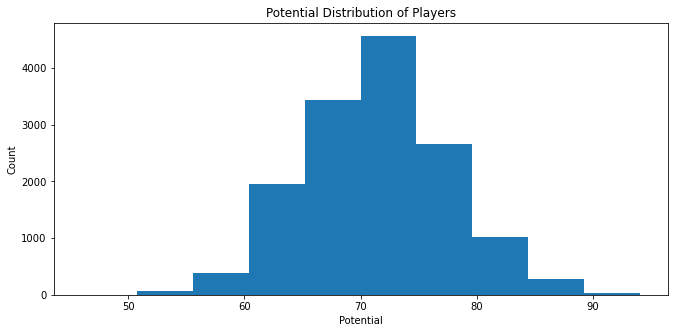

In [11]:
# Potential Distribution

train['Potential'].plot(kind='hist', figsize=(11,5))
plt.title('Potential Distribution of Players')
plt.xlabel('Potential')
plt.ylabel('Count')
plt.show()

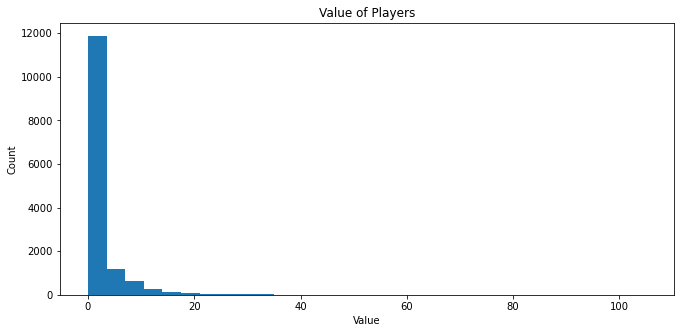

In [12]:
# Value Distribution

train['Value (M)'].plot(kind='hist', figsize=(11,5), bins=30)
plt.title('Value of Players')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [13]:
def player_value(value):
    if value <= 0.5:
        return 'value<0.5'
    elif value <= 1:
        return 'value(0.5-1)'
    elif value <= 3:
        return 'value(1-3)'
    elif value <= 10:
        return 'value(3-10)'
    elif value > 10:
        return 'value>10'

In [14]:
train['Player_Value'] = train['Value (M)'].map(player_value)

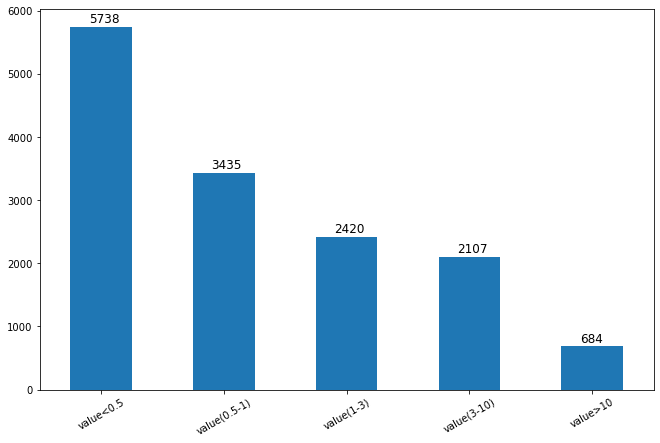

In [15]:
# Count of Player Value

train['Player_Value'].value_counts().plot(kind='bar', figsize=(11,7), rot=30)
ax = plt.axes()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+70), color="black", fontsize=12)

plt.show()

In [16]:
train[train['Value (M)'] == 0]

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position,Player_Value
7,10773,C. Bassogog,21,Cameroon,65,72,NaN,0.0,0.000,ST,value<0.5
65,2819,H. Kekana,32,South Africa,73,73,NaN,0.0,0.000,CDM,value<0.5
102,658,Gervinho,30,Ivory Coast,79,79,NaN,0.0,0.000,RW,value<0.5
108,2982,T. Hořava,29,Czech Republic,73,73,NaN,0.0,0.000,CAM,value<0.5
139,7014,Wang Yongpo,30,China PR,68,68,NaN,0.0,0.000,CAM,value<0.5
...,...,...,...,...,...,...,...,...,...,...,...
14299,3148,T. Simons,40,Belgium,73,73,Club Brugge KV,0.0,0.014,CB,value<0.5
14311,6711,R. Feltscher,26,Venezuela,68,71,NaN,0.0,0.000,LB,value<0.5
14359,9538,T. Hamed,28,Egypt,66,67,NaN,0.0,0.000,CDM,value<0.5
14372,7045,A. Aleksandrov,31,Bulgaria,68,68,NaN,0.0,0.000,CB,value<0.5


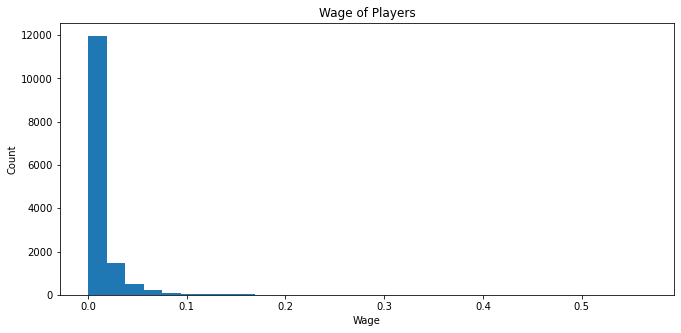

In [17]:
# Wage Distribution

train['Wage (M)'].plot(kind='hist', figsize=(11,5), bins=30)
plt.title('Wage of Players')
plt.xlabel('Wage')
plt.ylabel('Count')
plt.show()

In [18]:
def player_wage(wage):
    if wage <= 0.005:
        return 'value<0.005'
    elif wage <= 0.01:
        return 'value(0.005-0.01)'
    elif wage <= 0.03:
        return 'value(0.01-0.03)'
    elif wage <= 0.1:
        return 'value(0.03-0.1)'
    elif wage > 0.1:
        return 'value>0.1'

In [19]:
train['Player_Wage'] = train['Wage (M)'].map(player_wage)

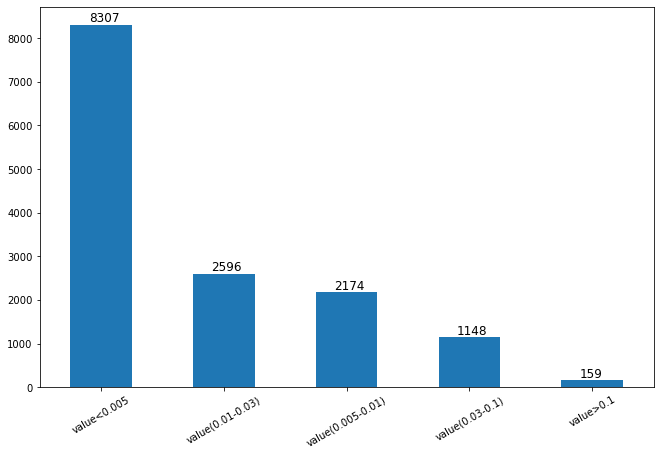

In [20]:
# Count of Player Wage

train['Player_Wage'].value_counts().plot(kind='bar', figsize=(11,7), rot=30)
ax = plt.axes()
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+70), color="black", fontsize=12)

plt.show()

In [21]:
train[train['Wage (M)'] == 0]

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position,Player_Value,Player_Wage
7,10773,C. Bassogog,21,Cameroon,65,72,NaN,0.0,0.0,ST,value<0.5,value<0.005
65,2819,H. Kekana,32,South Africa,73,73,NaN,0.0,0.0,CDM,value<0.5,value<0.005
102,658,Gervinho,30,Ivory Coast,79,79,NaN,0.0,0.0,RW,value<0.5,value<0.005
108,2982,T. Hořava,29,Czech Republic,73,73,NaN,0.0,0.0,CAM,value<0.5,value<0.005
139,7014,Wang Yongpo,30,China PR,68,68,NaN,0.0,0.0,CAM,value<0.5,value<0.005
...,...,...,...,...,...,...,...,...,...,...,...,...
14270,7213,L. Azcona,33,Ecuador,68,68,NaN,0.0,0.0,GK,value<0.5,value<0.005
14311,6711,R. Feltscher,26,Venezuela,68,71,NaN,0.0,0.0,LB,value<0.5,value<0.005
14359,9538,T. Hamed,28,Egypt,66,67,NaN,0.0,0.0,CDM,value<0.5,value<0.005
14372,7045,A. Aleksandrov,31,Bulgaria,68,68,NaN,0.0,0.0,CB,value<0.5,value<0.005


## EDA - Univariate (Categorical)

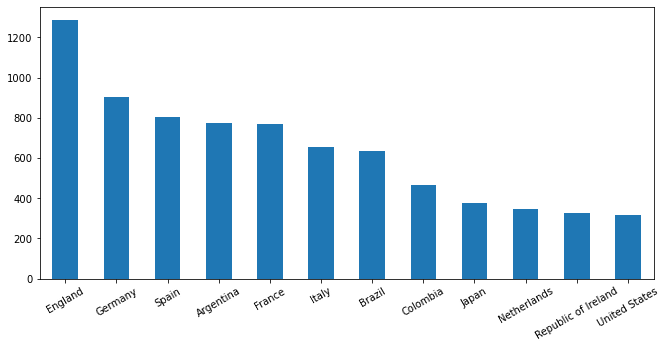

In [22]:
train['Nationality'].value_counts()[:12].plot(kind='bar', figsize=(11,5), rot=30)
plt.show()

In [23]:
train['Nationality'].unique()

array(['Germany', 'Italy', 'Belgium', 'Northern Ireland', 'Argentina',
       'Spain', 'Netherlands', 'Cameroon', 'Colombia', 'Sweden',
       'Australia', 'Saudi Arabia', 'England', 'Algeria', 'Portugal',
       'Brazil', 'Poland', 'Uruguay', 'Japan', 'Morocco',
       'Bosnia Herzegovina', 'Slovenia', 'France', 'Scotland', 'Denmark',
       'Panama', 'Norway', 'United States', 'Greece', 'Serbia',
       'South Africa', 'Austria', 'Venezuela', 'Chile', 'Romania',
       'Finland', 'Ecuador', 'Ivory Coast', 'Czech Republic', 'Albania',
       'Wales', 'FYR Macedonia', 'Nigeria', 'Turkey', 'China PR',
       'DR Congo', 'Guatemala', 'Korea Republic', 'Russia', 'Mexico',
       'Republic of Ireland', 'Croatia', 'Ghana', 'Costa Rica', 'Libya',
       'Qatar', 'Switzerland', 'Slovakia', 'India', 'Canada',
       'Sierra Leone', 'Lithuania', 'Paraguay', 'Benin', 'Tunisia',
       'Bulgaria', 'New Zealand', 'Gabon', 'Trinidad & Tobago', 'Niger',
       'Montenegro', 'Egypt', 'Ukraine', 'Libe

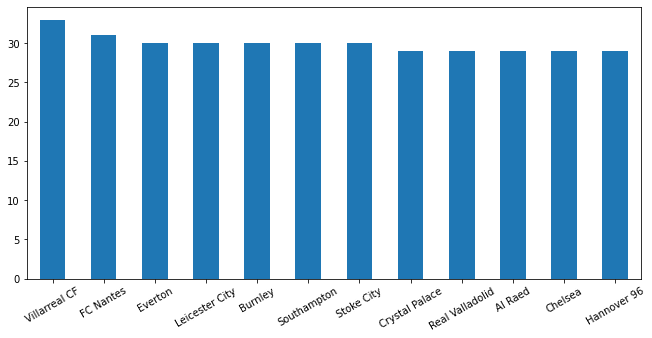

In [24]:
train['Club'].value_counts()[:12].plot(kind='bar', figsize=(11,5), rot=30)
plt.show()

In [25]:
train['Club'].unique()

array(['Korona Kielce', 'Cagliari', 'Atalanta', 'Stevenage',
       'Boca Juniors', 'Real Valladolid', 'FC Twente', nan, 'Angers SCO',
       'Jönköpings Södra IF', '1. FC Heidenheim', 'Al Ahli',
       'Charlton Athletic', 'Atlético Huila', 'Hansa Rostock', 'Tours FC',
       'CS Marítimo', 'Milan', 'Norwich City', 'Napoli',
       'Sandecja Nowy Sącz', 'SV Sandhausen', 'Al Hilal',
       'Shimizu S-Pulse', 'Bristol Rovers', 'Evkur Yeni Malatyaspor',
       'SKN St. Pölten', 'Sport Club do Recife', 'Chievo Verona',
       'Stade Rennais FC', 'Jaguares Fútbol Club', 'Rot-Weiß Erfurt',
       'Barnsley', 'AC Horsens', 'SpVgg Unterhaching', '1. FC Köln',
       'VfB Stuttgart', 'Cesena', 'RC Lens', 'Bradford City', 'Al Fayha',
       'Ferrara (SPAL)', 'Wisła Kraków', 'New York Red Bulls',
       'Halmstads BK', 'Ettifaq FC', 'Carlisle United', 'Al Qadisiyah',
       'Swindon Town', 'Benevento Calcio', 'Lillestrøm SK',
       'Panathinaikos FC', 'FC Schalke 04', 'Le Havre AC',
       'Par

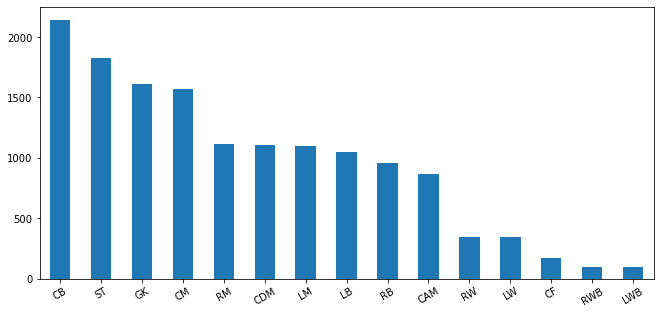

In [26]:
train['Position'].value_counts().plot(kind='bar', figsize=(11,5), rot=30)
plt.show()

In [27]:
train['Position'].unique()

array(['CDM', 'CM', 'RB', 'LB', 'RM', 'ST', 'CB', 'LM', 'GK', 'CAM', 'RW',
       'LW', 'CF', 'RWB', 'LWB'], dtype=object)

## Bivariate Analysis

In [28]:
train.columns

Index(['Id', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value (M)', 'Wage (M)', 'Position', 'Player_Value', 'Player_Wage'],
      dtype='object')

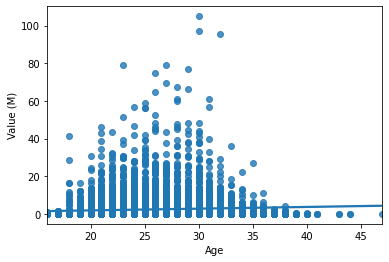

In [29]:
import seaborn as sns
sns.regplot(x='Age', y='Value (M)', data=train)
# Age and Value (M) have very low correlation

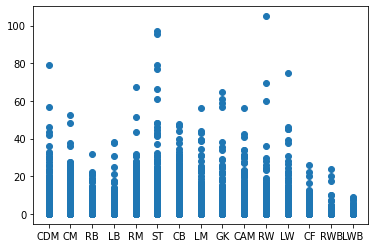

In [30]:
plt.scatter(train['Position'], train['Value (M)'])
# player at LWB have lowest valuation and players at ST, RW, LW, GK have higher valuations

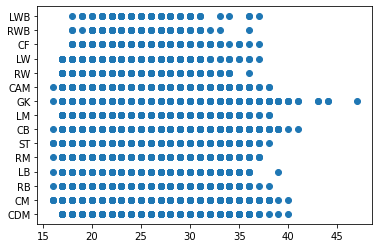

In [31]:
plt.scatter(train['Age'], train['Position'])
# Players selected as GK have the maximum age variation

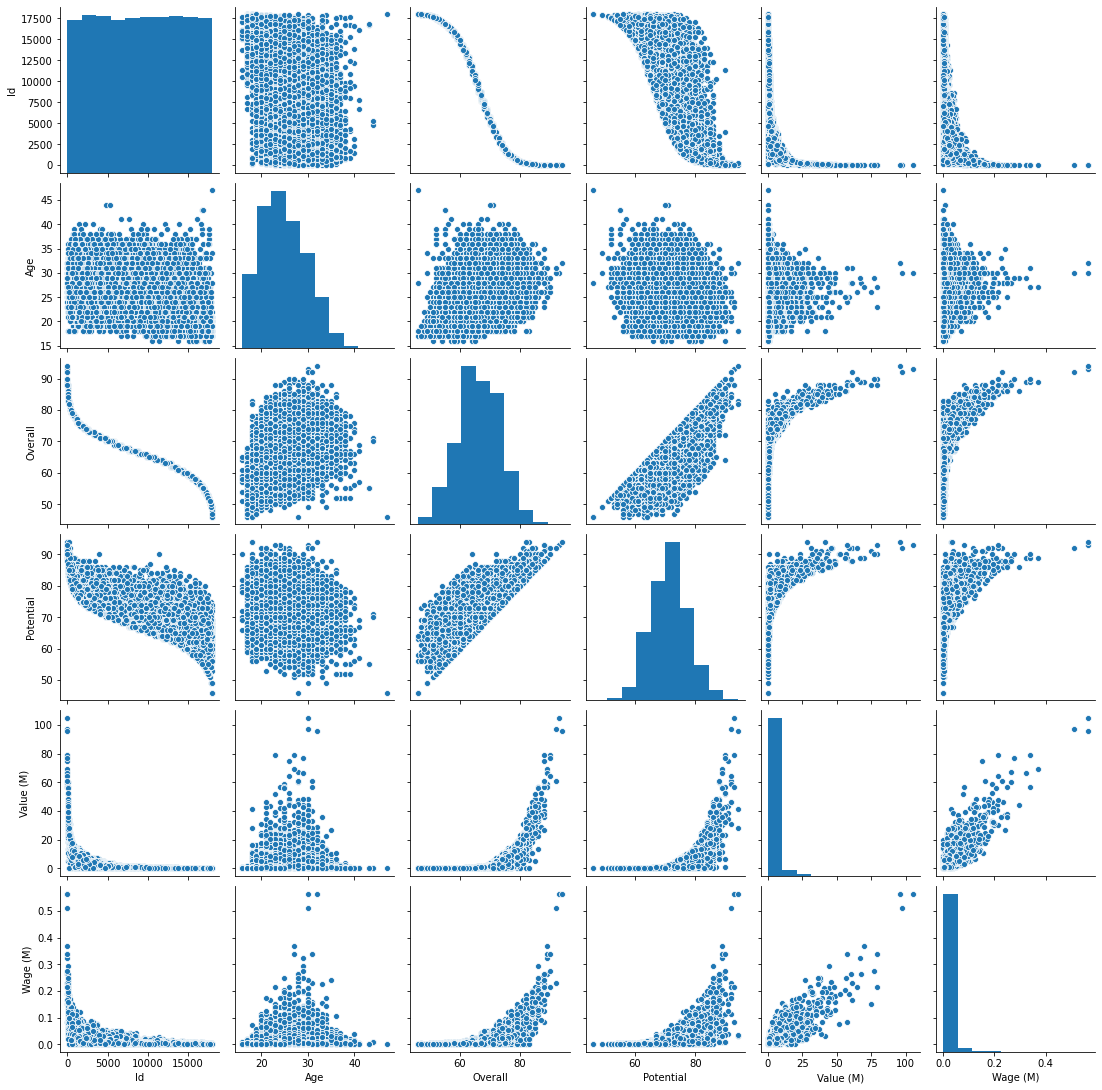

In [32]:
import seaborn as sns
sns.pairplot(train)
# As potential increases, value and wage increases in a kind of exponential manner
# Wage and Value are highly correlated

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [33]:
train.corr()['Value (M)']
# It gives correlation between the target value and numeric data columns not the categorical ones

Id          -0.548213
Age          0.082716
Overall      0.635618
Potential    0.595095
Value (M)    1.000000
Wage (M)     0.845124
Name: Value (M), dtype: float64

In [34]:
# Code Starts here
X = train.drop(['Value (M)', 'Player_Value', 'Player_Wage', 'Name', 'Id', 'Age' ], axis=1)

y = train['Value (M)']

# Code ends here

In [35]:
# Cat 2 int using OHE

X_OHE = pd.get_dummies(X, drop_first=True)

In [36]:
X_OHE.head()

,Overall,Potential,Wage (M),Nationality_Albania,Nationality_Algeria,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Australia,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,54,58,0.001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,73,0.010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,72,79,0.013,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,57,66,0.002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,75,0.002,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
# Split the data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_OHE, y, train_size=0.8, random_state=10)

In [38]:
from sklearn.linear_model import LinearRegression,Lasso,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [39]:
# fitting different models on the train data

lr = LinearRegression()
ls = Lasso()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
br = BayesianRidge()

In [40]:
# Loop over models and calculate RMSE
from sklearn.metrics import r2_score

models = [('Linear Regression', lr), ('Lasso', ls), ('Random Forest', rf), 
          ('Gradient Boosting', gb), ('Bayesian Ridge', br)]

for m in models:
    model = m[1]
    name = m[0]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    print(f"R2 Score for {name}")
    rsquared = r2_score(y_val, y_pred)
    print(rsquared)
    

R2 Score for Linear Regression
-2.796756771603863e+16
R2 Score for Lasso
0.5016952349346376
R2 Score for Random Forest
0.9422788979501457
R2 Score for Gradient Boosting
0.9542028116423383
R2 Score for Bayesian Ridge
0.7863513157050707


In [47]:
X_train.head()

,Overall,Potential,Wage (M),Nationality_Albania,Nationality_Algeria,Nationality_Angola,Nationality_Antigua & Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Australia,...,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
313,54,66,0.001,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10697,72,76,0.010,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13621,63,73,0.002,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2238,66,68,0.005,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11509,79,80,0.022,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Polynomial Features

In [95]:
# dropping categorical columns for fitting Polynomial regression 

X1 = X.drop(['Nationality', 'Club', 'Position'], axis=1)

In [96]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X1, y, train_size=0.8, random_state=10)

In [97]:
X_train2.head()

,Overall,Potential,Wage (M)
313,54,66,0.001
10697,72,76,0.010
13621,63,73,0.002
2238,66,68,0.005
11509,79,80,0.022


In [98]:
X_val2.head()

,Overall,Potential,Wage (M)
5204,69,69,0.005
1701,67,67,0.008
6111,63,70,0.002
13736,53,69,0.001
4658,61,74,0.002


In [99]:
print(X_train2.shape)
print(X_val2.shape)
print(y_train2.shape)
print(y_val2.shape)

(11507, 3)
(2877, 3)
(11507,)
(2877,)


In [100]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 4) 
X_poly_train = poly.fit_transform(X_train2) 
X_poly_train.shape

(11507, 35)

In [115]:
X_poly_val = poly.transform(X_val2)
X_poly_val.shape

(2877, 35)

In [116]:
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)

LinearRegression()

In [119]:
y_pred_val = model_poly.predict(X_poly_val) 

In [120]:
# calculate the r2 score
r2= r2_score(y_val2, y_pred_val)
print("R2 score: ",r2)

R2 score:  0.9311304906774244


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [107]:
# Code Starts here
test = pd.read_csv('../fifa/test.csv')
test.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Wage (M),Position
0,280,C. Vela,28,Mexico,82,82,Real Sociedad,0.046,ST
1,569,J. Stones,23,England,79,85,Manchester City,0.105,CB
2,8731,V. Vermeij,22,Netherlands,67,74,Heracles Almelo,0.007,ST
3,10085,G. Omae,27,Japan,65,65,Omiya Ardija,0.002,CAM
4,9831,N. Miatke,27,Germany,66,67,FSV Zwickau,0.001,LM


In [108]:
test.isnull().sum()

Id              0
Name            0
Age             0
Nationality     0
Overall         0
Potential       0
Club           37
Wage (M)        0
Position        0
dtype: int64

In [109]:
id_col = test['Id']

In [110]:
id_col

0         280
1         569
2        8731
3       10085
4        9831
        ...  
3592     5584
3593     4629
3594     6123
3595      664
3596     4238
Name: Id, Length: 3597, dtype: int64

In [112]:
X_test = test.drop(['Name', 'Id', 'Age','Nationality', 'Club', 'Position' ], axis=1)

In [113]:
X_test.head()

,Overall,Potential,Wage (M)
0,82,82,0.046
1,79,85,0.105
2,67,74,0.007
3,65,65,0.002
4,66,67,0.001


In [114]:
poly = PolynomialFeatures(degree = 4) 
X_poly_test = poly.fit_transform(X_test) 
X_poly_test.shape

(3597, 35)

In [121]:
y_pred_test = model_poly.predict(X_poly_test) 

In [122]:
submission=pd.concat([id_col, pd.Series(y_pred_test)], axis=1)
submission.rename(columns={0:'Value (M)'},inplace=True)
submission.head()

,Id,Value (M)
0,280,16.552701
1,569,17.662903
2,8731,1.090769
3,10085,0.345453
4,9831,0.538655


In [123]:
submission.to_csv('final_submission.csv',index=None,header=True)